In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("SEntFiN-v1.csv")

In [3]:
df

,S No.,Title,Decisions,Words
0,1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8
1,2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8
2,3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8
3,4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7
4,5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8
...,...,...,...,...
10748,10749,"Negative on Chambal, Advanta: Mitesh Thacker","{""Chambal"": ""negative"", ""Advanta"": ""negative""}",6
10749,10750,"Small, Mid-cap stocks may emerge outperformers","{""Small"": ""positive"", ""Mid-cap stocks"": ""posit...",6
10750,10751,Rupee slips against US dollar,"{""Rupee"": ""negative"", ""US dollar"": ""neutral""}",5
10751,10752,Rupee weak against US dollar,"{""Rupee"": ""negative"", ""US dollar"": ""neutral""}",5


In [4]:
headlineList = df["Title"].tolist()
sentimentEntityDict = [eval(e) for e in df["Decisions"]]

### Let us only consider only those news items that have a single entity and sentiment

In [5]:
indCount = len(headlineList)
headline = [headlineList[ind] for ind in range(indCount) if len(sentimentEntityDict[ind].keys())==1]
sentiment = [list(sentimentEntityDict[ind].values())[0] for ind in range(indCount) if len(sentimentEntityDict[ind].keys())==1]

### Let us print the reduced dataset

In [6]:
for x,y in zip(headline,sentiment):
    print(y,'\t',x)

neutral 	 SpiceJet to issue 6.4 crore warrants to promoters
neutral 	 MMTC Q2 net loss at Rs 10.4 crore
positive 	 Mid-cap funds can deliver more, stay put: Experts
positive 	 Mid caps now turn into market darlings
neutral 	 Market seeing patience, if not conviction: Prakash Diwan
neutral 	 Infosys: Will the strong volume growth sustain?
positive 	 Hudco raises Rs 279 cr via tax-free bonds
neutral 	 HOEC could retest 30-35 levels: Ashwani Gujral
neutral 	 Genpact appoints Edward J Fitzpatrick as CFO
positive 	 EXL beats profit estimates, cuts sales outlook
neutral 	 Wait and watch on Bharti Airtel: Vinay Khattar
positive 	 Ashok Leyland raises Rs 667 crore through QIP
negative 	 At Wipro, growth remains a mirage
neutral 	 Oil prices mixed ahead of US supply report
neutral 	 Makemytrip expands share sale plan
neutral 	 Gur closes quiet on some support
neutral 	 Gur closes steady on low demand
neutral 	 Gur closes steady on thin trade
neutral 	 Gur remains flat in tight movements
neutral

neutral 	 Sebi notifies rules for using IPEF for refunding investors
neutral 	 Sebi orders attachment of demat a/c of MPS Greenery
neutral 	 Sebi orders attachment of demat, bank accounts of defaulter
neutral 	 Sebi proposes including family trusts, NBFCs in QIB segment
neutral 	 Sebi proposes new title of "vice-chairpersons" for its members
neutral 	 Sebi to fix strict enforcement timelines, focus on refund
neutral 	 Sebi to meet rating companies today for reality check
neutral 	 Sebi to revisit policy on proprietary trading by brokers
neutral 	 Sebi to soon notify norms to regulate research analysts
neutral 	 Sebi to study global systems to catch manipulators early
neutral 	 Sebi to tap social media for investor awareness campaigns
neutral 	 Sebi wants young, high-earning worker pension money in MFs
neutral 	 Sectors that are likely to outperform in Samvat 2071
neutral 	 Selection panel for Sebi chief reset; PMO nominee included
neutral 	 Sennheiser appoints Gunjan Srivastava as MD f

neutral 	 A $25 fall in crude is like a $10-billion stimulus for Indian economy, say experts; top stock bets
neutral 	 Any global risk-off scenario can lead to sharp market reaction at this time: Mahesh Patil, Birla Sunlife MF
neutral 	 Consumption space would be largely favoured with the roll out of GST : Deven Choksey, KR Choksey Securities
neutral 	 Harsh Mariwala in no hurry to pass on the baton of Marico to his children Rishabh & Rajvi
neutral 	 Tremendous opportunities ahead to take leadership role in India's evolution: Umang Bedi, MD Sales and Marketing, Adobe Systems
neutral 	 Road shows for SAIL FPO delayed
neutral 	 Amitabh Chakraborty quits Religare
neutral 	 IBM India sacks executives for fraud'
neutral 	 Shreejit Mishra, two others quit HUL
neutral 	 Emcure Pharmaceuticals withdraws proposed IPO
neutral 	 Why it will be a tough task for Vishal Sikka to revive Infosys back to its glory
neutral 	 Association of Mutual Funds in India warns members to stay away from suspicious

positive 	 Crude palm oil futures up on rise in spot demand
positive 	 DCM Shriram net rises 300 pc to Rs 36 crore
positive 	 Debt-heavy companies make the most of rate surprises, stocks surge
neutral 	 Despite early chill,2014 to be hot year for equities: Deutsche
positive 	 Development Credit Bank's Q1 net soars to Rs 43 cr
positive 	 DHFL Q1 net profit up 22% at Rs 147.15 cr
positive 	 Discom loan recast to power up shares of PSU banks
positive 	 Earnings outlook strong, keep on buying Eicher Motors: Hemindra Hazari
positive 	 ECL Finance debenture issue fully subscribed; raises Rs 500 crore
neutral 	 EIH to raise over Rs 1,160 cr through rights issue
positive 	 Emami Q3 profit rises 31 pc to Rs 150.68 crore
positive 	 ENIL's charts look healthy from short-medium term perspective: Deepak Mohoni
positive 	 Eros International at 10% premium; sees high of Rs 213.95
positive 	 Escorts rallies over 30% in six sessions; more upside seen
positive 	 Escorts seeks to revive earnings with foc

positive 	 CMC may spring positive surprise next week, among small cap IT names: Avinnash Gorakssakar
positive 	 Dhoni's CSK will play IPL, says SC; India Cements on the ball, up 8%
positive 	 Escorts posts 77 pc jump in Q2 net profit; to set up new plant
positive 	 FIIs to pump $2.55 billion into Indian debt market; Rupee set to strengthen further
positive 	 Force Motors doubles in 2 weeks, vrooms 400% in 1 year; should you buy?
positive 	 Foreign Guar Gum buyers return after prices crash by more than 50 per cent
positive 	 Gateway Distriparks rallies nearly 5% on reports that it plans to list rail unit
positive 	 HDFC Bank Q4 net up 30 per cent at Rs 1890 crore, meets forecast
positive 	 HSIL rallies 11% after RBI allows FIIs to buy shares; ends nearly 3% down
positive 	 JustDial Ltd is a 'BUY' call with a target of Rs 1550: Mitesh Thacker
positive 	 KEC International looks attractive on revenue visibility and margin improvement: Mayuresh Joshi, Angel Broking
positive 	 Kesoram Indus

negative 	 Stay Away from ADAG basket: Ashwani Gujral, Market Strategist
negative 	 Stretched valuations likely to keep Emami stock under pressure
negative 	 Sugar futures trade lower by 0.15% on higher supply
negative 	 Sugar turns bitter for india mills as losses mount
negative 	 Supply crunch, rising prices make Indian black pepper uncompetitive
negative 	 Surging oil marketing companies may stumble on subsidy woes
negative 	 Surya Pharma CDR fails; bankers to start recovery process
negative 	 TBZ Q3 net dips 23pc to Rs 19.07 crore
negative 	 Technology stocks in decline stoke fear in US investors
negative 	 Tesco woes drag down Britain FTSE 100 share index
negative 	 Texmaco Rail & Engineering posts lower Q2 net profit
negative 	 There are near term issues with Infosys: IV Subramaniam
negative 	 Time to book out of Sesa Sterlite: Ambareesh Baliga
negative 	 Tin bear market shuts 70% of Indonesia's smelting capacity
negative 	 Transglobal sells Kingfisher Airlines shares worth Rs 7.

negative 	 Stay away from JSW Steel till clarity on CBI mine inquiry: Deven Choksey
negative 	 STOCK TO WATCH: ACCs Q1 PAT seen 40% down at Rs 238 crore
neutral 	 Strict import curbs drop gold demand by 13.5% in 2014: World Gold Council
negative 	 Structural issues may continue to weigh on realty stocks; bounceback unlikely: Deepak Shenoy
negative 	 Sustained Call writing at strike price 8,300 on Nifty50 keeping bulls at bay
negative 	 There's a massive poaching raid going on at Lehman's old wealth management shop
negative 	 Two-wheeler stocks to remain under pressure on fall in rural spending: Hemindra Hazari
negative 	 Ultratech Cement's Q3 net profit dips 38 per cent to Rs 370 crore
negative 	 UltraTech Jun qtr net dips 14% to Rs 673 crore on lower sales
negative 	 Union Bank posts 27% fall in Q4 net profit at Rs 578.88 crore
negative 	 Usha Martin slips over 5% as Q4 loss widens to Rs 9.68 crore
negative 	 Worst is not over; Nifty could go down to sub-7500 level: Sandeep Wagle
nega

neutral 	 NSEL follows govt diktat, modifies contracts as per law
neutral 	 NSEL investors forum to appeal against High Court Order
neutral 	 One can selectively look into auto sector: Mehraboon Irani
neutral 	 OPEC Secy-Gen says low oil price will not continue
neutral 	 Opening of Saudi stock market to boost MENA region
neutral 	 Ozone Pharma planning for IPO in the near future
neutral 	 P Madhusudan assumes charge as new CMD of RINL
neutral 	 Patni founders rule out stake sale plans at AGM
neutral 	 Petronet LNG posts flat performance for March 2013 quarter
neutral 	 Piramal Enterprises Q1 net profit at Rs 4.08 crore
neutral 	 Piramal offer floating rate bonds, but will investors gain?
neutral 	 Prabhudas Lilladhers largecap ideas to buy in Muhurat trading
neutral 	 Pre-market: Nifty likely to open gap-down on Greece woes
neutral 	 Pre-market: Nifty seen opening flat in special trading session
neutral 	 Pre-market: Nifty50 may open flat tracking mixed global cues
neutral 	 Prime Brok

positive 	 Pepper futures up on output concerns
positive 	 Palm oil stock soars
positive 	 Street mood lifts Oriental Hotels
positive 	 Long-term target in ONGC is positive
positive 	 Omnitech charts high growth curve
positive 	 Oil-led margin growth begins aiding earnings
positive 	 Nouveau Multimedia approve stock-split; stk gains
positive 	 Near-term outlook seen strong for Nifty
positive 	 NHPC gains on higher electricity generation
positive 	 NHAI bond sees record subscription
positive 	 NBFC space looks attractive: Gaurav Doshi
positive 	 Narayana Hrudayalaya IPO oversubscribed 8.63 times
positive 	 Nalco reports record turnover in 2012-13
positive 	 NALCO to pay 18% interim dividend
positive 	 Mustardseed futures up on increased buying
positive 	 Mustard seed futures up further
positive 	 Mphasis looks positive: Mitesh Thacker
positive 	 Monsanto gains on parent's bullish outlook
positive 	 Wait and watch Monsanto: Sudip Bandyopadhyay
positive 	 Medium sugar advance on better de

positive 	 Infinite Computer IPO sees robust demand; subscribed 43 times
positive 	 Infosys leads CNX IT rally ahead of Q1FY15 results
positive 	 Infrastructure stocks could see some bounce back: Sangeeta Purushottam
positive 	 Interest is returning to the large caps: Deepak Mohoni
positive 	 Investor confidence to be back with Infosys: Gaurang Shah
positive 	 Investors will be overweight on equities in long term'
positive 	 Its time to take banking sector funds into account
positive 	 Jain Irrigation to consider raising $200 million; stock up
positive 	 Japan's zero interest rate pushes gold to new high
positive 	 JBM Auto Q1 net profit soars 60 per cent
positive 	 Jeera futures surge 1.38 per cent on strong demand
positive 	 Jim Rogers buys euros, says bailouts will destroy currency
positive 	 JMD Telefilms to enter mobile phone biz; stock up
positive 	 JSW Energy quarterly profit soars to Rs 214 crore
positive 	 Just Dial rallies on launch of new search app
positive 	 Jyoti soars 18

positive 	 Suven Life Sciences Q1 net up 16.68% at Rs 34.74 cr
positive 	 Taiwan stocks up slightly on caution ahead of key orders data
positive 	 Talbros Auto top bet from auto componenet space: P Phani Sekhar
positive 	 Tata Chemicals Q1 net jumps over two-fold to Rs 175.50 crore
positive 	 TBZ net profit rises 58% to Rs 18.49 crore in Q4
positive 	 Techno Electric's Q1 FY13 PAT at Rs 40.7 crore, up 24%
positive 	 There is still lot of interest in IT stocks: Anil Manghnani
neutral 	 These are good times to buy: Vijai Mantri, Pramerica Mutual Fund
positive 	 Time for CNX IT to hit a new high: Ashwani Gujral
positive 	 Top-6 blue-chips add Rs 38,362 cr in m-cap; TCS biggest gainer
positive 	 Traders bullish on natural gas even as inventories may show rise
positive 	 Trent to raise up to Rs 250 cr through shares sale
positive 	 TTML narrows down net loss to Rs 156.36 crore in Q3
positive 	 Turnaround in biz fortunes helps ABNL post a profit in Q3
positive 	 TVS Motor Q2 net jumps over t

negative 	 Expect choppiness on Nifty to continue: Mitesh Thacker
negative 	 Finolex Industries falls over 12% on weak results
negative 	 Flat Nifty OI data hints at trend reversal
negative 	 GAIL slips nearly 2% after explosion at pipeline
negative 	 Genpact Q4 net declines 8.6% to $48.8 million
negative 	 Gitanjali Gems chief, 25 others suspended from trading
negative 	 Global growth concerns trim Asia FX weekly gains
negative 	 Gold extend weakness on sluggish demand, global cues
negative 	 Gold futures down 0.43% on weak global cues
negative 	 GSFC Q3 profit dips 26% on sluggish sales
negative 	 Guarseed futures decline on mounting stocks, weak export
negative 	 Hedge funds hit by wrong kind of volatility
negative 	 Henkel India's Q4 loss widens to Rs 18.33
negative 	 Hero MotoCorp October sales declines 8%; stock down
negative 	 Hexaware: Growth to remain low for another quarter
negative 	 Hindalco plunges as Q1 net profit shrinks 67%
negative 	 Hong Kong shares fall, but post qua

negative 	 Gold stuck near 7-1/2 month low; set for worst week since May
negative 	 Gold trades near 4-month low before European Central Bank decision, US data
negative 	 Gold's longest run in a year ends as US inflation picks up
negative 	 GSFC Q3 net profit down 26 per cent at Rs 101.20 crore
negative 	 GVK Power & Infra posts Q1 net loss of Rs 281.34 crore
negative 	 Hedge funds give up betting on oil as prices continue to tumble
negative 	 Hong Kong shares fall on weak global markets, protest worries; China weaker
negative 	 Hong Kong shares snap 3 days of losses as global outlook improves
negative 	 HPCL tanks nearly 8% post Q2; Rs 2,041 crore m-cap shaved off
negative 	 HSIL falls nearly 4% after approving QIP at discount to floor price
negative 	 IDFC Ltd April-June net down 13 per cent at Rs 449 crore
negative 	 India VIX loses steam, volumes sink to less than Rs 1 crore
negative 	 Indo Rama Synthetics posts net loss of Rs 26 cr in Q1
negative 	 Infosys ends 3% down; global bro

In [8]:
#Dataset size
print(len(headline))
print(len(sentiment))

7903
7903


In [9]:
#!pip install -U sentence-transformers
#from sentence_transformers import SentenceTransformer

from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
vectorizer = TfidfVectorizer(sublinear_tf=True, use_idf=True)
#vectorizer_t = SentenceTransformer('all-MiniLM-L6-v2')
    
#splitting the data into train and test dataset in 70 : 30 ratio at random
X_train, X_test, y_train, y_test = train_test_split(headline, sentiment, test_size = 0.1)

#vectorizing the training data
#fit_transform() does two jobs, fit() and transform()
#fit calculates the statistics of the data
#transform takes care of any missing values or unexpected values by utilizing statistics calculated by fit
X_train_vector = vectorizer.fit_transform(X_train)

#Alternatively, one may use the transormer vectorizer
#X_train_vector = vectorizer_t.encode(X_train)

#vectorizing the testing data
#transform takes care of any missing values or unexpected values based on fit for training data
X_test_vector = vectorizer.transform(X_test)

#Alternatively, one may use the transormer vectorizer
#X_test_vector = vectorizer_t.encode(X_test)

#using SVC package to initialize a classifier with Linear kernel and other default parameters
model = SVC(kernel= 'linear')

#fitting the sparse matrix in the classifier with their respective sentiments
model.fit(X_train_vector, y_train)


#this print accuracy score for the training and test dataset
print("Training accuracy",model.score(X=X_train_vector,y=y_train))
print("Testing accuracy",model.score(X=X_test_vector,y=y_test))

#predicting the sentiments for the test dataset
y_pred = model.predict(X_test_vector)

Training accuracy 0.9419291338582677
Testing accuracy 0.8407079646017699


[[180  43  12]
 [ 19 220  29]
 [ 13  34 241]]


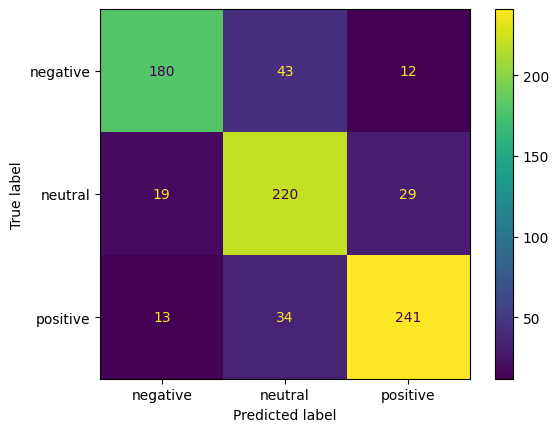

In [18]:
m = metrics.confusion_matrix(y_test,y_pred,labels=model.classes_)
print(m)
# Better visualization of a confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=m,display_labels=model.classes_)
disp.plot()
plt.show()

### Let us test the model

In [11]:
s = ["The stock price is expected to decline."]
v = vectorizer.transform(s)
y_pred = model.predict(v)
print(y_pred,'\t',s)

['negative'] 	 ['The stock price is expected to decline.']


### This is a token based model and does not understand the semantics.
For instance, if the model has learnt, "The stock price is expected to decline." is negative, it may not know what to do if a sentence like "The stock price is expected to reduce." comes up.
This problem can be resolved by using sentence transformer based vectorizers.

In [12]:
s = ["The stock price is expected to reduce."]
v = vectorizer.transform(s)
y_pred = model.predict(v)
print(y_pred,'\t',s)

['positive'] 	 ['The stock price is expected to reduce.']


### There is a huge scope of improvement in the above model. Create your own models with different vectorizers and classifiers (like, neural networks). The accuracies can easily be taken over 90% with the right data and model.

Please refer to the following papers for further details and additional results on sentiment analysis for financial text.

Sinha, A., Kedas, S., Kumar, R., & Malo, P. (2022). SEntFiN 1.0: Entity‐aware sentiment analysis for financial news. Journal of the Association for Information Science and Technology, 73(9), 1314-1335.

https://asistdl.onlinelibrary.wiley.com/doi/abs/10.1002/asi.24634

Dataset: https://www.kaggle.com/datasets/ankurzing/aspect-based-sentiment-analysis-for-financial-news

Malo, P., Sinha, A., Korhonen, P., Wallenius, J., & Takala, P. (2014). Good debt or bad debt: Detecting semantic orientations in economic texts. Journal of the Association for Information Science and Technology, 65(4), 782-796.

https://asistdl.onlinelibrary.wiley.com/doi/abs/10.1002/asi.23062

Dataset: https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news